In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
merged = pd.read_csv('./merged_dataset.csv')
df1 = pd.read_csv('./AA Data Challenge Datasets/prod_A.csv')
df2 = pd.read_csv('./AA Data Challenge Datasets/prod_B.csv')
user_data = pd.read_csv('./AA Data Challenge Datasets/user_data.csv')

In [3]:
merged = pd.DataFrame(merged, columns = ['user_id', 'country', 'age', 'gender', 'start_date', 'ds1', 'ds2'])

In [4]:
merged_1 = user_data.merge(df1, how='inner', left_on='user_id', right_on='userid')
merged_2 = user_data.merge(df2, how='inner', left_on='user_id', right_on='userid')
product1 = merged.dropna(subset=["ds1"]).reset_index().drop(["ds2"], axis = 1)
product2 = merged.dropna(subset=["ds2"]).reset_index().drop(["ds1"], axis = 1)

# Q1 Average user question

* country
* age
* gender
* start_date
* frequency of buying

US    577205
PL     91992
NL     84406
DE     62791
UK     49375
FR     43605
DK     42494
CZ     38173
IT     23883
FI     22064
ES      3685
Name: country, dtype: int64


Text(0, 0.5, 'Count')

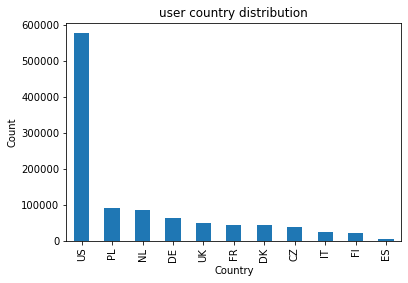

In [5]:
country_all = merged["country"].value_counts()
print(country_all)
ax = country_all.plot(kind='bar', title='user country distribution')
ax.set_xlabel("Country")
ax.set_ylabel("Count")

average age for all users is  38.461664388706836


Text(0, 0.5, 'Count')

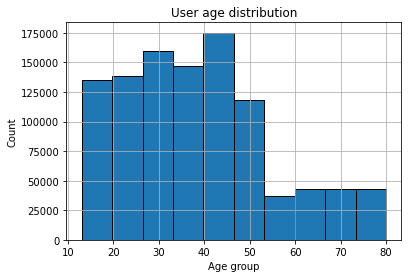

In [8]:
print("average age for all users is ", np.average(merged["age"]))
ax = merged.age.hist(edgecolor="k")
ax.set_title("User age distribution")
ax.set_xlabel("Age group")
ax.set_ylabel("Count")

male       699466
female     272324
unknown     67883
Name: gender, dtype: int64


Text(0, 0.5, 'Count')

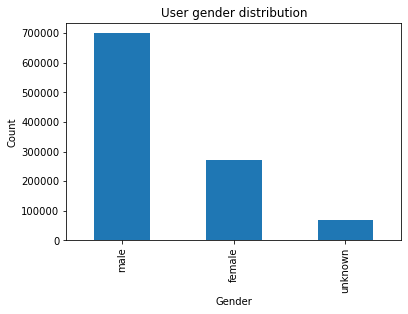

In [9]:
gender_all = merged['gender'].value_counts()
print(gender_all)
ax = gender_all.plot(kind='bar', title='User gender distribution')
ax.set_xlabel("Gender")
ax.set_ylabel("Count")

In [10]:
date = merged["start_date"].value_counts()
date_month = pd.DatetimeIndex(merged['start_date']).month.value_counts()
date_day = pd.DatetimeIndex(merged['start_date']).day.value_counts()
print("start_date_distribution", date)
print("start_date_distribution_by_month", date_month)
print("start_date_distribution_by_day", date_day)

start_date_distribution 2018-10-26    3154
2018-05-05    3154
2018-12-09    3153
2018-03-30    3141
2018-10-27    3139
              ... 
2018-11-09    2715
2018-03-21    2700
2018-11-03    2693
2018-08-29    2681
2018-11-10    2678
Name: start_date, Length: 356, dtype: int64
start_date_distribution_by_month 5     91297
1     91076
3     90800
10    90627
7     90196
8     90124
6     87697
4     87377
9     87236
11    86030
2     82482
12    64731
Name: start_date, dtype: int64
start_date_distribution_by_day 9     35548
18    35394
16    35385
21    35276
13    35183
7     35064
22    35025
5     35024
12    35020
19    35007
14    35007
17    34981
10    34974
11    34960
15    34924
20    34870
1     34855
8     34779
3     34776
4     34695
6     34693
2     34579
23    32560
27    32528
26    32447
28    32325
24    32210
25    31868
30    29312
29    28840
31    17564
Name: start_date, dtype: int64


<BarContainer object of 12 artists>

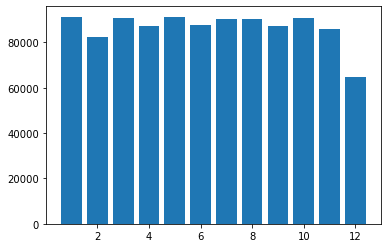

In [13]:
plt.bar(date_month.keys(), date_month.tolist())

<BarContainer object of 31 artists>

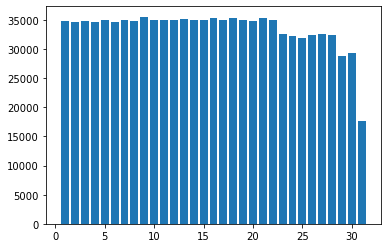

In [174]:
plt.bar(date_day.keys(), date_day.tolist())

### **Average user:**
- **Country** : US
- **Age** : ~38.5
- **Gender** : Male
- **Start date** : 09 May 2018

In [21]:
np.average(list(pd.DatetimeIndex(merged['start_date']).day))

15.463994929174847

In [22]:
np.average(list(pd.DatetimeIndex(merged['start_date']).month))

6.374576429319603

# 1. country

In [24]:
product2.country.value_counts()

US    171241
PL     53513
NL     49113
DE     36760
UK     28849
FR     25330
DK     24817
CZ     22051
IT     13831
FI     12929
ES      2204
Name: country, dtype: int64

In [25]:
country1 = product1.country.value_counts()
country2 = product2.country.value_counts()

Text(0, 0.5, 'Count')

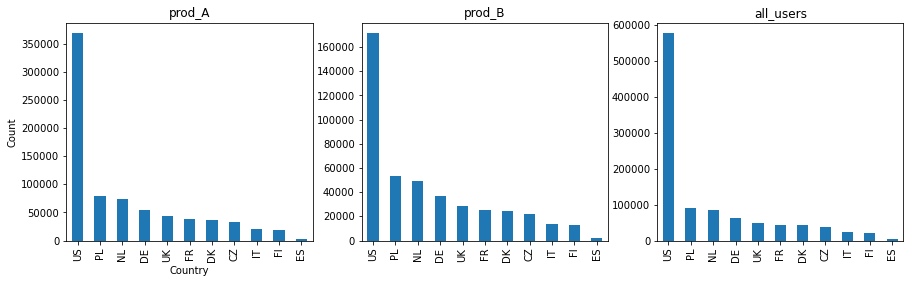

In [26]:
# 通过 series中的plot方法进行指定是哪一个子图
fig, axs = plt.subplots(1, 3, figsize=(15,4))
ax = country1.plot(ax=axs[0], kind='bar', title='prod_A')
ax.set_xlabel("Country")
ax.set_ylabel("Count")
country2.plot(ax=axs[1], kind='bar', title='prod_B')
ax.set_xlabel("Country")
ax.set_ylabel("Count")
country_all.plot(ax=axs[2], kind='bar', title='all_users')
ax.set_xlabel("Country")
ax.set_ylabel("Count")

# 2. age

In [27]:
age1 = product1.drop_duplicates(['user_id'])
age2 = product2.drop_duplicates(['user_id'])
age = merged.drop_duplicates(['user_id'])

In [28]:
print(age1.describe()['age']['mean'], age2.describe()['age']['mean'], age.describe()['age']['mean'])

38.152477284913125 34.632018923205116 33.28667166666666


Text(0, 0.5, 'Count')

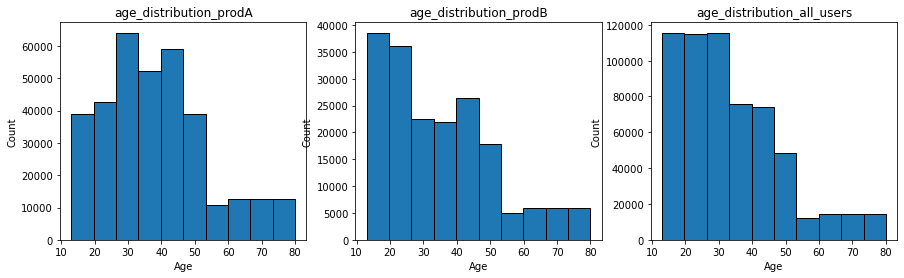

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))
ax = age1['age'].plot(ax=axs[0], kind='hist', edgecolor="k", title='age_distribution_prodA')
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax = age2['age'].plot(ax=axs[1], kind='hist', edgecolor="k", title='age_distribution_prodB')
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax = age['age'].plot(ax=axs[2], kind='hist',edgecolor="k", title='age_distribution_all_users')
ax.set_xlabel("Age")
ax.set_ylabel("Count")

# 3. gender

male       518454
female     201924
unknown     50396
Name: gender, dtype: int64 male       296301
female     115596
unknown     28741
Name: gender, dtype: int64


Text(0, 0.5, 'Count')

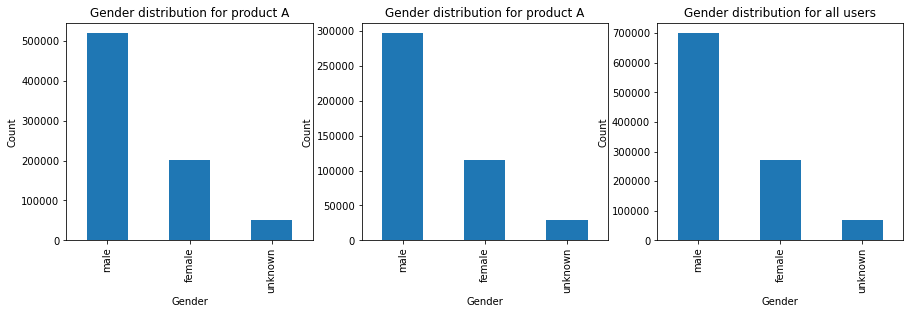

In [31]:
genderA = product1['gender'].value_counts()
genderB = product2['gender'].value_counts()
gender_all = merged['gender'].value_counts()
print(genderA, genderB)
fig2, axs2 = plt.subplots(1, 3, figsize=(15,4))
ax = genderA.plot(ax=axs2[0], kind='bar', title='Gender distribution for product A')
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax = genderB.plot(ax=axs2[1], kind='bar', title='Gender distribution for product A')
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax = gender_all.plot(ax=axs2[2],kind='bar', title='Gender distribution for all users')
ax.set_xlabel("Gender")
ax.set_ylabel("Count")

# 4. start date

<BarContainer object of 12 artists>

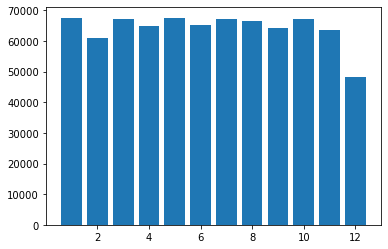

In [230]:
dateA = product1["start_date"].value_counts()
date_monthA = pd.DatetimeIndex(product1['start_date']).month.value_counts()
date_dayA = pd.DatetimeIndex(product1['start_date']).day.value_counts()
plt.bar(date_monthA.keys(), date_monthA.tolist())

<BarContainer object of 31 artists>

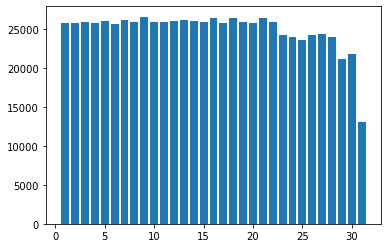

In [232]:
plt.bar(date_dayA.keys(), date_dayA.tolist())

<BarContainer object of 12 artists>

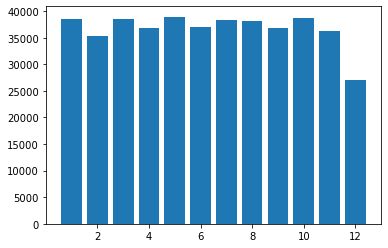

In [231]:
dateB = product2["start_date"].value_counts()
date_monthB = pd.DatetimeIndex(product2['start_date']).month.value_counts()
date_dayB = pd.DatetimeIndex(product2['start_date']).day.value_counts()
plt.bar(date_monthB.keys(), date_monthB.tolist())

<BarContainer object of 31 artists>

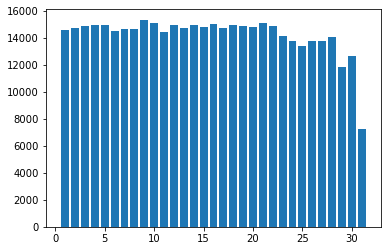

In [234]:
plt.bar(date_dayB.keys(), date_dayB.tolist())

# 5. frequency_buying

In [75]:
print(merged_1.userid.value_counts(), merged_2.userid.value_counts())

5699415    15
1720409    13
4457476    13
3117556    13
1776320    12
           ..
7852005     1
1558500     1
1617050     1
6543295     1
3619449     1
Name: userid, Length: 345035, dtype: int64 7536739    8
8050324    7
3064133    7
2843346    7
2298861    6
          ..
9407137    1
9071261    1
6709916    1
6443674    1
2621440    1
Name: userid, Length: 186015, dtype: int64


(array([2.60017e+05, 4.30490e+04, 3.30290e+04, 5.14100e+03, 2.40500e+03,
        1.22900e+03, 1.23000e+02, 3.80000e+01, 3.00000e+00, 1.00000e+00]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <BarContainer object of 10 artists>)

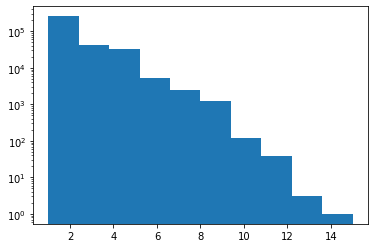

In [238]:
plt.hist(merged_1.userid.value_counts().tolist(), log=True)

(array([1.46511e+05, 3.24350e+04, 5.97300e+03, 0.00000e+00, 9.49000e+02,
        1.30000e+02, 0.00000e+00, 1.30000e+01, 3.00000e+00, 1.00000e+00]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

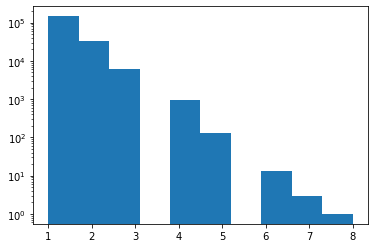

In [237]:
plt.hist(merged_2.userid.value_counts().tolist(), log=True)